# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/alaplace17/linearModels/blob/main/data/cars_hw.csv?raw=true')

In [3]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
df.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [5]:
df.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64

In [7]:
if df['Price'].dtype == object:
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
else:
    df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float) #If Price is already numeric, it might contain commas as thousands separators
                           

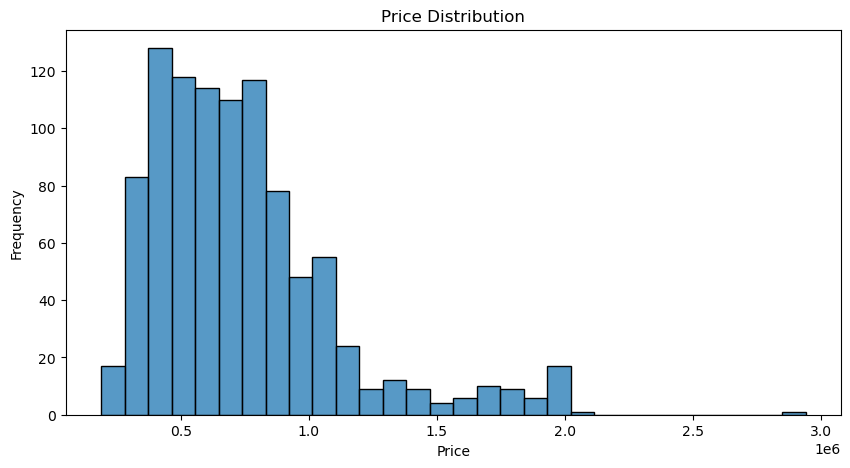

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

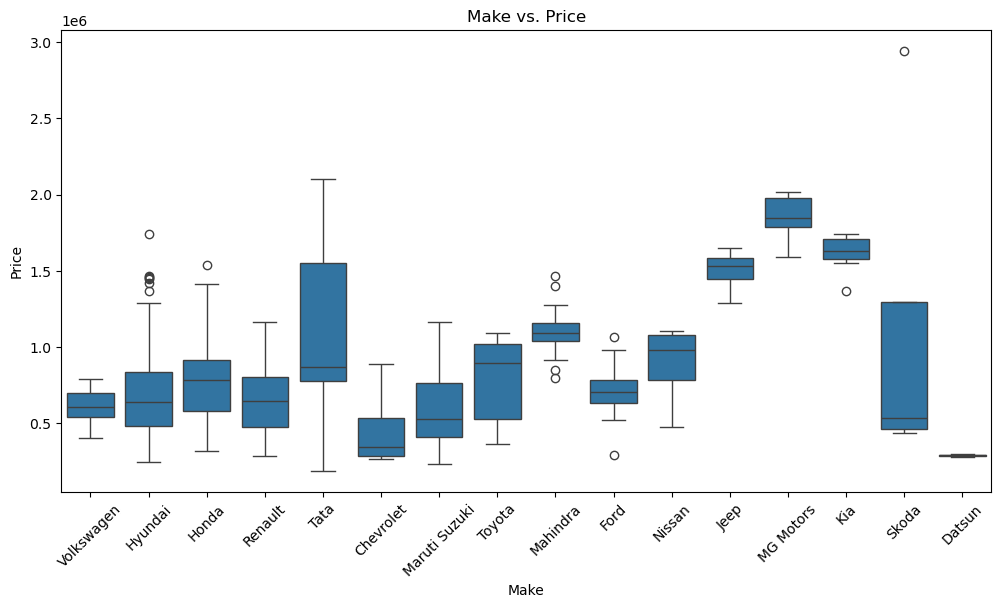

In [9]:
# Price vs. Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Price', data=df)
plt.title('Make vs. Price')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

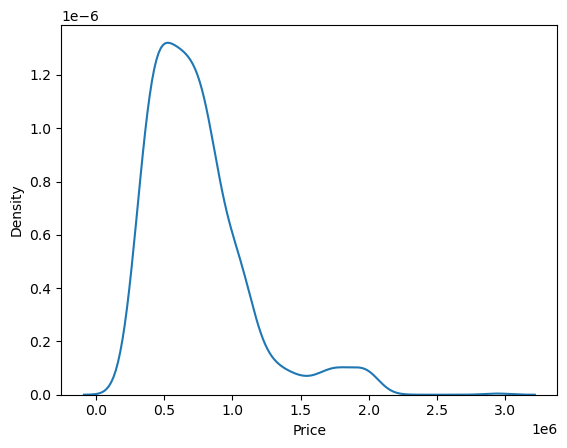

In [10]:
sns.kdeplot(df['Price'])

<Axes: xlabel='price_log', ylabel='Density'>

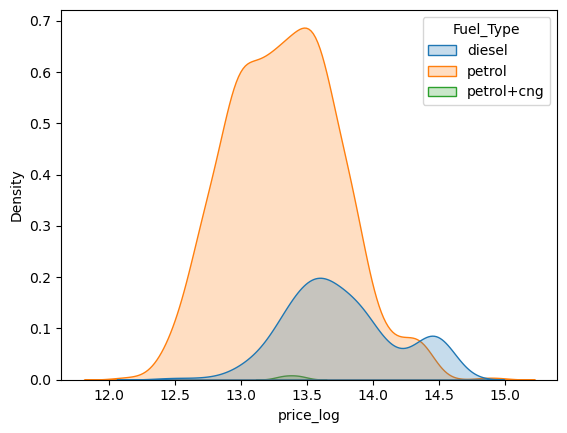

In [11]:

df['price_log'] = np.log(df['Price'])
sns.kdeplot(data = df, x = 'price_log', hue = 'Fuel_Type', fill = True)

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [12]:
# Categorical Get dummies
df2 = pd.get_dummies(df[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], dtype='int', drop_first=True)
df2.head()

,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,Make_Nissan,...,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


3. Implement an ~80/~20 train-test split. Put the test data aside.

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [14]:
#~80/~20 train-test split
#Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(df[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], drop_first=True)
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [16]:
#Simple linear models that include no transformations or interactions
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_hat = simple_linear_model.predict(X_train)
print('R-squared: ', simple_linear_model.score(X_train, y_train))
print('RMSE: ', np.sqrt(np.mean((y_train - y_hat)**2)))

R-squared:  0.7628195739658099
RMSE:  181713.21165479007


In [18]:

y_hat = simple_linear_model.predict(X_test)
print('R-squared: ', simple_linear_model.score(X_test, y_test))
print('RMSE: ', np.sqrt(np.mean((y_test - y_hat)**2)))

R-squared:  0.761318123130959
RMSE:  167197.0253191336


The R squared for the training set is 0.762 and the RMSE is 181713.2. The R squared for the test set is 0.761 and the RMSE is 167197.02. The better model is the test set one because of its lower RMSE.

5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 

In [19]:
from scipy.stats.mstats import winsorize

In [20]:
df.loc[:, ['Make_Year', 'Mileage_Run', 'Seating_Capacity'] ] = df.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity'] ].apply(winsorize)
y = df['Price'] #Target variable
df['Make_Year X Price'] = df['Mileage_Run'] * df['Seating_Capacity']  #Interaction term
#X_d = pd.get_dummies(df['brand'],dtype='int',drop_first=True) #Create brand dummies
X_n = df.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity']]
#X = pd.concat([X_n,X_d],axis=1)
X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) #Fit the linear model
print('Rsq: ', reg.score(X,y) )

Rsq:  0.31241063371763944


In [21]:

var =  'Make_Year'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) #Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) #Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

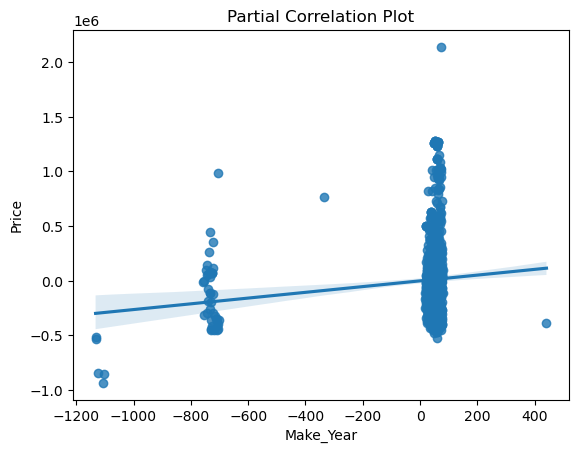

In [22]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

In [23]:
var =  'Mileage_Run'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) #Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) #Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

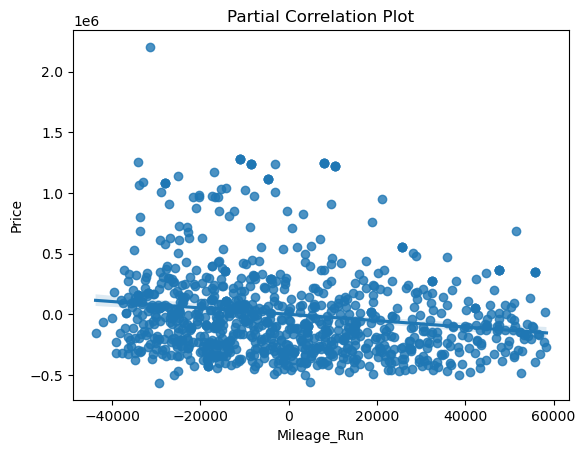

In [24]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

In [25]:
var =  'Seating_Capacity'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) #Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) #Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

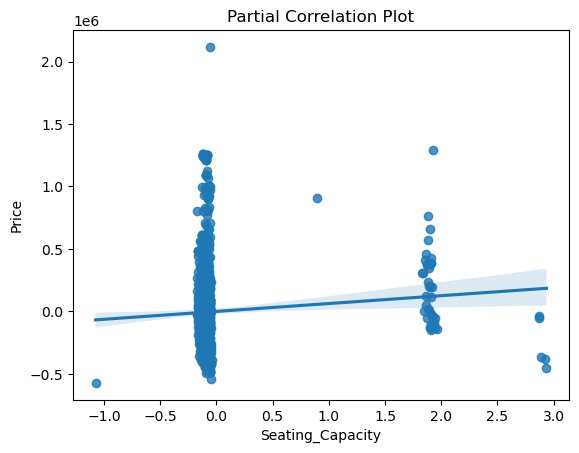

In [26]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

***There are significant non linearities in Make_Year and Seating_Capacity***

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [27]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
complex_linear_model = LinearRegression()
complex_linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [29]:
y_hat = complex_linear_model.predict(X_train_poly) #X_train_poly for prediction
print('R-squared: ', complex_linear_model.score(X_train_poly, y_train)) #X_train_poly for score calculation
print('RMSE: ', np.sqrt(np.mean((y_train - y_hat)**2)))

R-squared:  0.9005655339336354
RMSE:  117656.39973326938


In [30]:
y_hat = complex_linear_model.predict(X_test_poly) #X_test_poly for prediction
print('R-squared: ', complex_linear_model.score(X_test_poly, y_test))
print('RMSE: ', np.sqrt(np.mean((y_test - y_hat)**2)))

R-squared:  -1.1561294953105823e+22
RMSE:  3.679781781188003e+16


***R squared on the training set is 0.9006 and -1.1571 E22 on the test set. The RMSE is 117656 on the training set and 3.679781 E16 on the test set. The values for the test set are very poor, and I'm not sure how to explain it. 

7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

***The I've learned that you can overfit or underfit any model, so there is alot of nuance to how you go about choosing the right model parameters***

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.